<h2>Lab 5</h2>

In [16]:
import sqlite3
import subprocess
import pandas as pd
import numpy as np
import scipy.misc
from wand.image import Image as WImage

In [17]:
import subprocess
import matplotlib as plt
import matplotlib.image as img

<h4>Mehak Sharma | BioE 131 | Fall 2019</h4>

Questions: 
Will the AND-1 riboswitch cleave itself when both of its OBS are bound? Yes, it receives two TRUE signals which would translate into a TRUE output (self-cleavage)

Will the OR-1 riboswitch cleave itself when neither of its OBS are bound? No, this logic function requires at least one of its OBS to be bound to output TRUE (self-cleave)

What behavior do we expect from the YES-1 riboswitch? The switch will turn on and off in the presence or absence, respectively, of DNA-1



First up, grab the sequences from the paper:

Sequence, OBS, Site II information from:
- Penchovsky, Robert, and Ronald R. Breaker. "Computational design and experimental validation of oligonucleotide-sensing allosteric ribozymes." Nature biotechnology 23.11 (2005): 1424.

In [18]:
# (1) riboswitch name
# (2) start and end coordinates of OBS-1 (blue region)
# (3) start and end coordinates of OBS-2 (blue region, only applicable to AND-1 and OR-1)
# (4) start and end coordinates of the two red regions.

yes1 = "GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"
not1 = "GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC"
and1 = "GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACCAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU"
or1 = "GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUCAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"

Using a Pandas DataFrame to hold all data about the sequences.

In [19]:
data = pd.DataFrame([['YES-1', yes1, 26, 57, -1, -1, 16, 21, 49, 55],
                             ['NOT-1', not1, 44, 66, -1, -1, 40, 43, 74, 77],
                             ['AND-1', and1, 30, 45, 49, 64, 16, 23, 70, 77],
                             ['OR-1',  or1,  27, 46, 47, 66, 16, 26, 67, 77]], 
                    columns = ['Name', 'Seq', 'obs1start', 'obs1end',
                                         'obs2start', 'obs2end', 'red1start', 'red1end',
                                         'red2start', 'red2end'],
                           )
data.set_index('Name', inplace = True)

Now, write a routine to fold RNA

1) Start by generating one plot per riboswitch (YES-1, NOT-1, AND-1, and OR-1) with default parameters.

Questions
Compare each plot to the native conformation given in the publication.

1. Are they the same? The NOT-1, AND-1, and OR-1 plot looks similar to the conformation in the publication.
2. Are they different? The YES-1 plot looks different from the conformation in the publication.
3. Are there any stem-loop structures that don’t match up? There are stemp-loop structures that do not match up in the AND-1 plot 4. What might explain the differences? See if you can track down the parameters the authors used and compare them to the default RNAfold parameters (e.g., temperature, algorithm, etc). The paper's approach relies on the application of thermodynamic parameters using the RNAfold source code from the Vienna RNA folding package. We used a default temperature of 37 degrees. The dynamic programming algorithm to generate the set of parameters may be different.

In [20]:
# YES-1 Plot
proc = subprocess.run(['RNAfold'], input = bytes(yes1, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE,check=True)
print(proc.stdout)
proc2 = subprocess.run(['RNAplot'], input=proc.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
print(proc2.stderr)
proc3 = subprocess.call('convert rna.ps rna_yes_1.png', shell=True)
print(proc3)

img = img.imread('rna_yes_1.png')

a = subprocess.run(['ls'], stdout=subprocess.PIPE, stderr=subprocess.PIPE,check=True)
print(a.stdout)

b'GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC\n((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)\n'
b''
0
b'and-1TT.png\nfig1.png\nfig2.png\nLab 5\nlab5.ipynb\nor=1TT.png\nrna0.svg\nrna1.svg\nrna2.svg\nrna3.svg\nrna_and_1.png\nrna_not_1_constraints.png\nrna_not_1.png\nrna_or_1.png\nrna.ps\nrna_yes_1_constraints.png\nrna_yes_1.png\nTFrna_or_1_constraints.png\nTTrna_or_1_constraints.png\n'


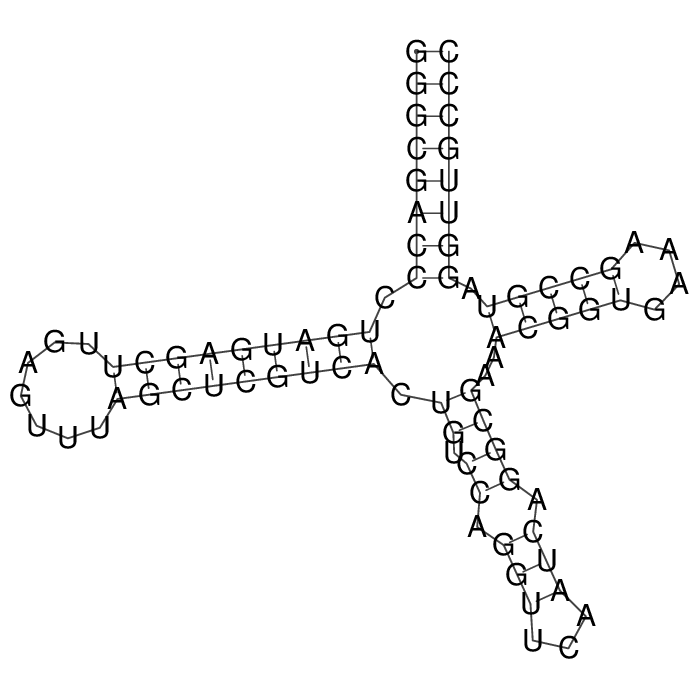

In [21]:
img = WImage(filename='rna_yes_1.png')
img

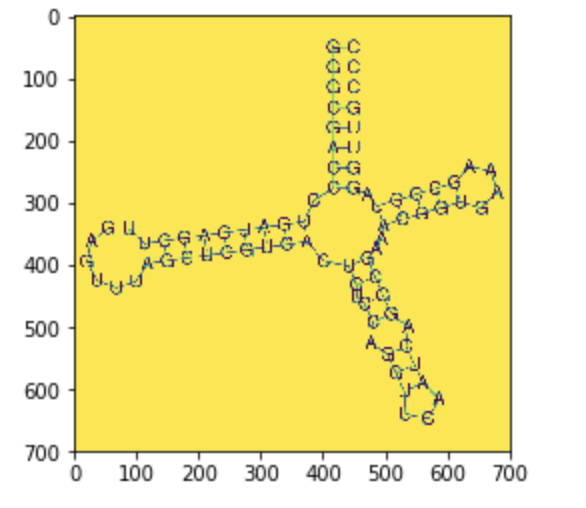

In [23]:
import scipy.misc

In [ ]:
# NOT-1 Plot

proc = subprocess.run(['RNAfold'], input = bytes(not1, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE,check=True)
proc2 = subprocess.run(['RNAplot'], input=proc.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
proc3 = subprocess.call('convert rna.ps rna_not_1.png', shell=True)

img = img.imread('rna_not_1.png')

a = subprocess.run(['ls'], stdout=subprocess.PIPE, stderr=subprocess.PIPE,check=True)


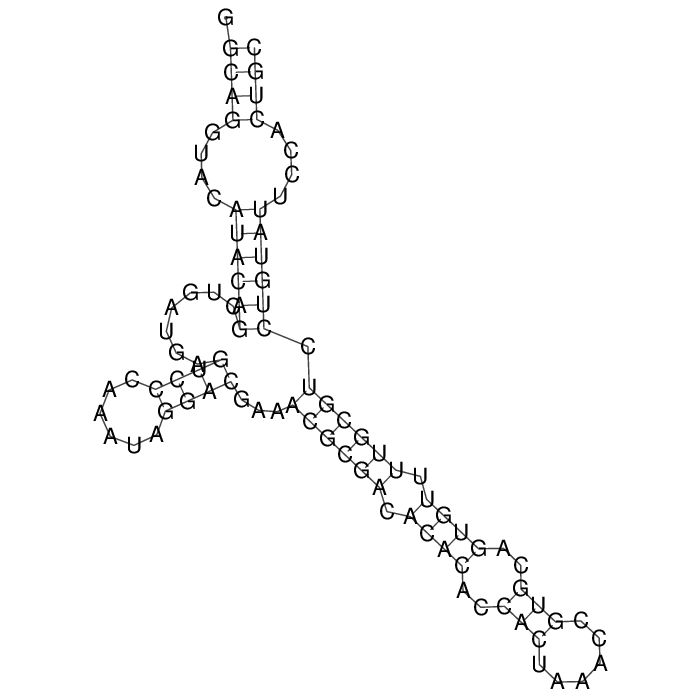

In [27]:
img = WImage(filename='rna_not_1.png')
img

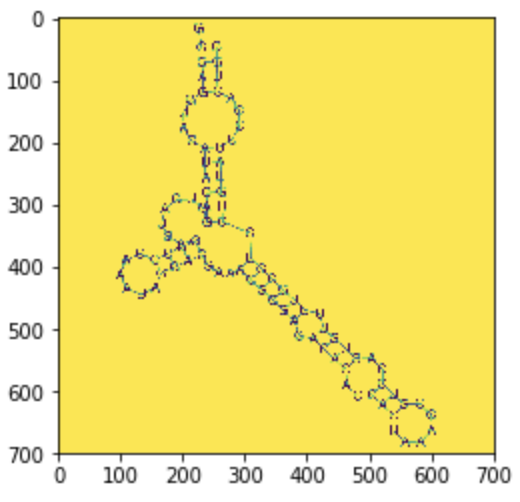

In [ ]:
# AND-1 Plot
proc = subprocess.run(['RNAfold'], input = bytes(and1, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE,check=True)
proc2 = subprocess.run(['RNAplot'], input=proc.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
proc3 = subprocess.call('convert rna.ps rna_and_1.png', shell=True)
img = img.imread('rna_and_1.png')
imgplot = plt.imshow(img)
plt.show()

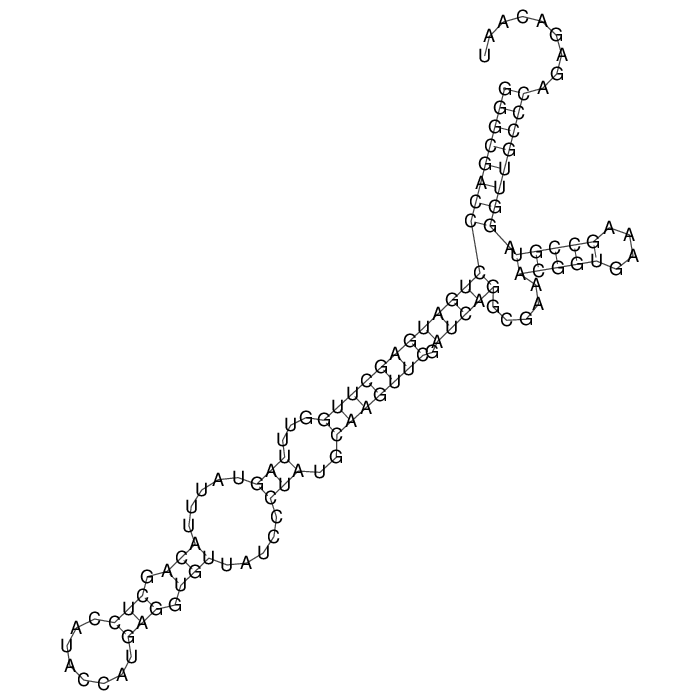

In [28]:
img = WImage(filename='rna_and_1.png')
img

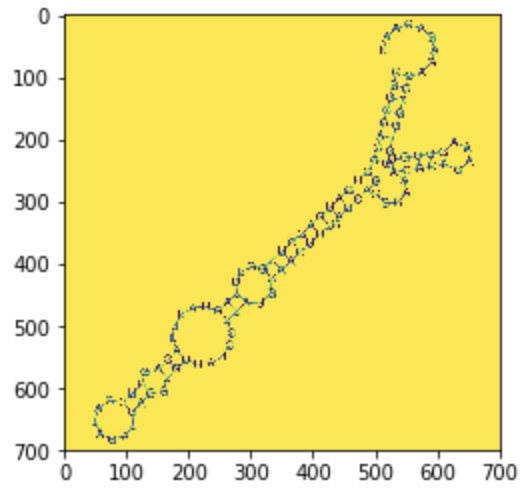

In [ ]:
# OR-1 Plot
proc = subprocess.run(['RNAfold'], input = bytes(or1, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE,check=True)
proc2 = subprocess.run(['RNAplot'], input=proc.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
proc3 = subprocess.call('convert rna.ps rna_or_1.png', shell=True)
img = img.imread('rna_or_1.png')
imgplot = plt.imshow(img)
plt.show()

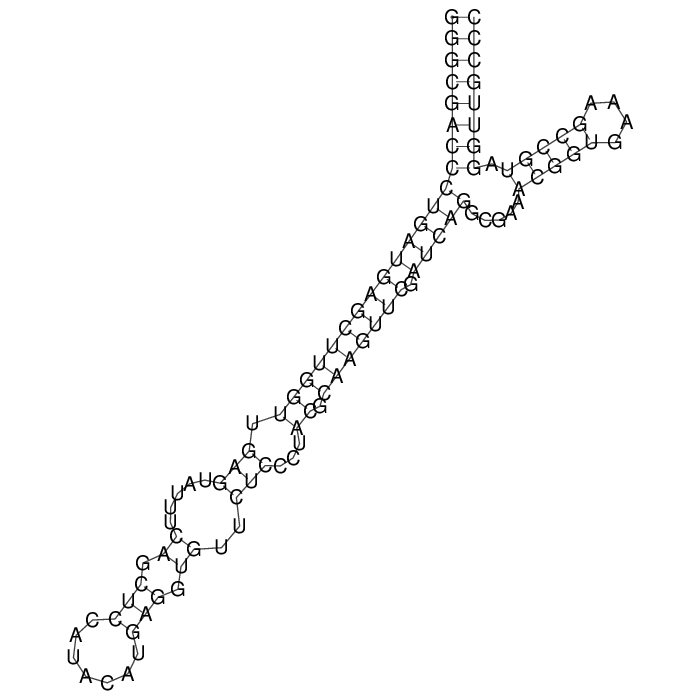

In [29]:
img = WImage(filename='rna_or_1.png')
img

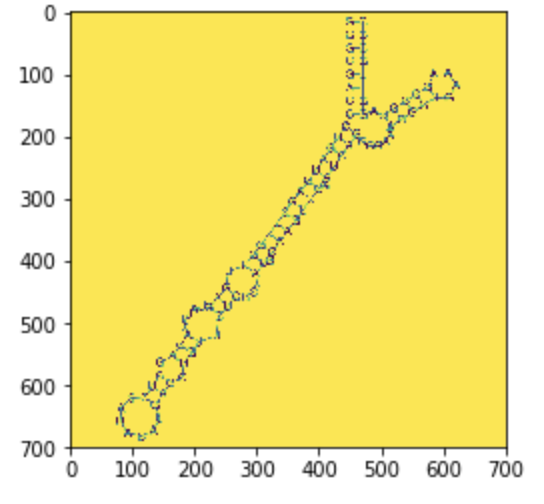

RNAfold outputs a .ps file with an image of the folded sequence using RNAplot, so I converted these images to files and compared them to the structures in Penchovsky & Breaker's paper. Below are my comparisons for each sequence:

<b>YES-1</b>
The fold appears to be significantly different to that found in the paper. Our fold includes four branches around the main bubble fold, instead of three, so the OBS region is largely mismatched.

<b>NOT-1</b>
The fold appears to be very similar to the fold seen in the paper. Both OBS and red regions were folded correctly. NOT-1 had the red regions bound to each other, indicating that cleavage occurs. 

<b>AND-1</b>
Our AND-1 fold also appears to be very similar to that in the paper. The red regions appear where they are supposed to, and all folds and bubbles appear exactly how they should, indicating no cleavage. 

<b>OR-1</b>
The OR-1 fold also folded similar to that in the paper, with all stems and loops matching. However, we saw that in both AND-1 and OR-1, the red regions did not bind to each other. 

For reference, below are the structures in Penchovsky & Breaker's paper.

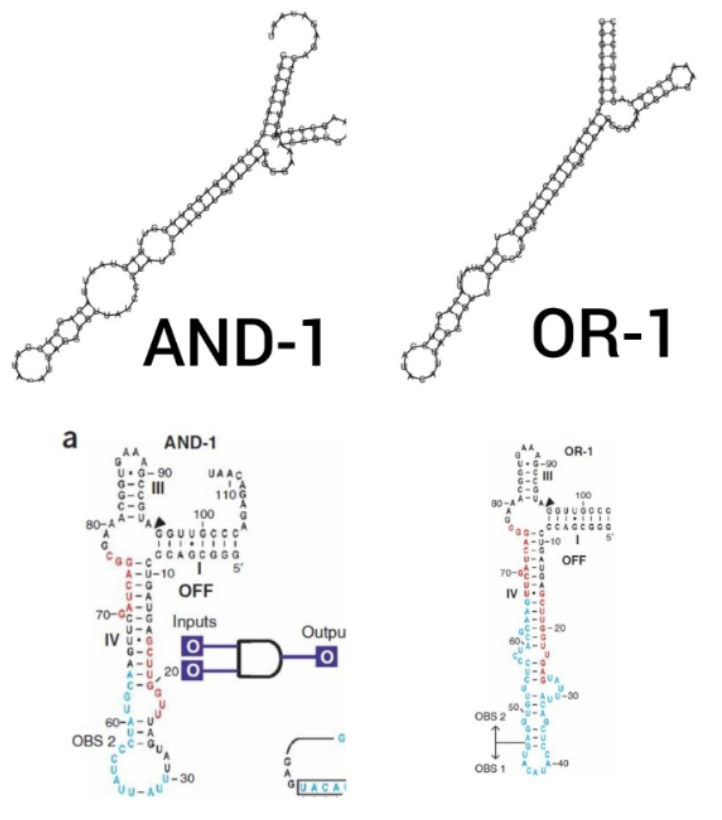

In [37]:
img = WImage(filename='fig1.png')
img


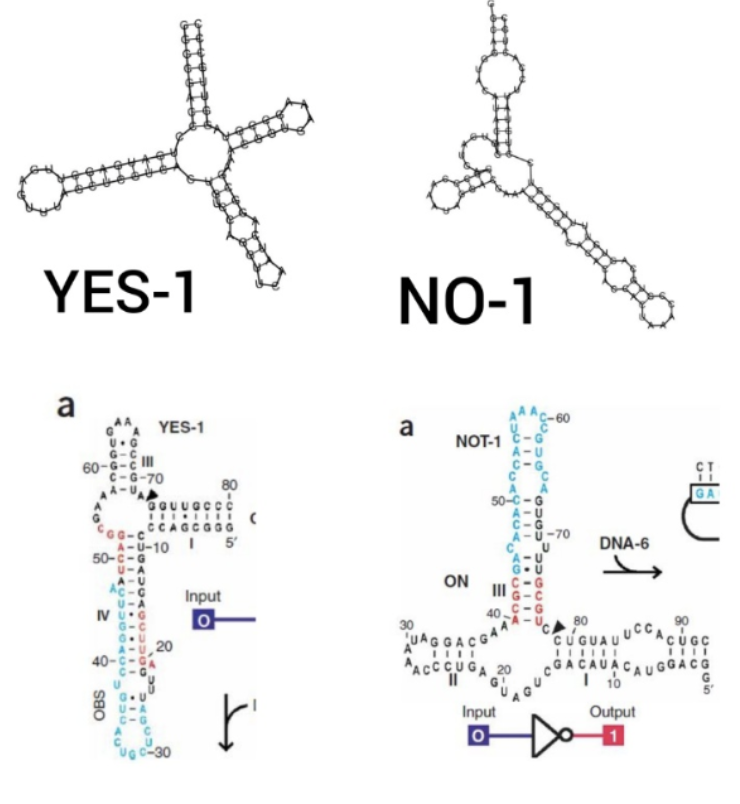

In [38]:
img2 = WImage(filename='fig2.png')
img2

(2) Next, <b>simulate OBS binding in YES-1 and NOT-1. </b> The idea here is that we’d like to see what conformation these riboswitches adopt when their target OBS is bound.To simulate OBS binding, we tell RNAfold to prevent the blue OBS region (that we noted down in our table above) from pairing to any other region of the riboswitch. To do this, we pass the -C parameter to RNAfold using a file which we will have to generate.

Now, fold YES-1 again with constraints and see what you get. Does it look like the self-cleaving form of YES-1 in Figure 2? Are the red regions bound to each other?
This figure does not look like the self-cleaving form of YES-1 in Figure 2. The red regions are not bound to each other at the red regions.

In [ ]:
fold = subprocess.run('RNAfold -C yes_1_constraints.txt', stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True, shell=True)
print(fold.stdout)
fold2 = subprocess.run(['RNAplot'], input = fold.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
fold3 = subprocess.call('convert rna.ps rna_yes_1_constraints.png', shell = True)
img = img.imread('rna_yes_1_constraints.png')
plot = plt.imshow(img)
plt.show()

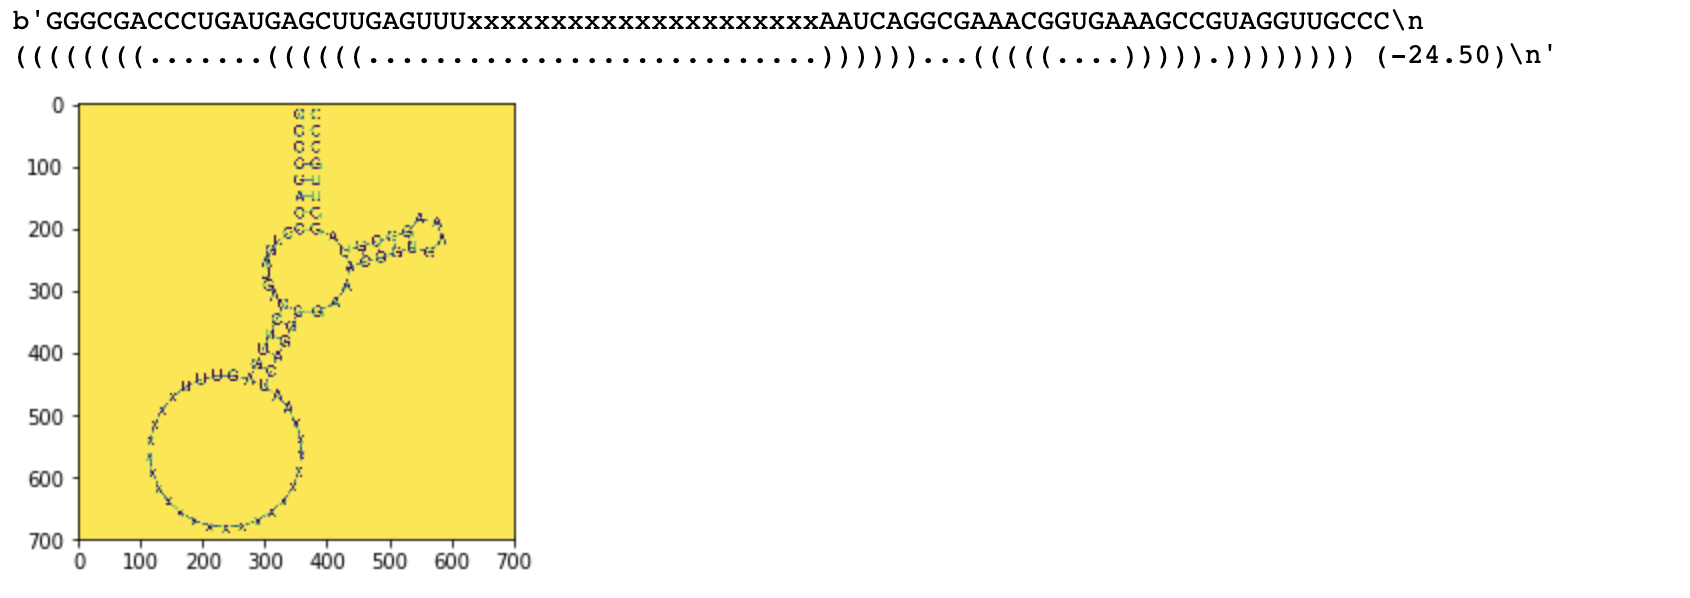

In [30]:
img = WImage(filename='rna_yes_1_constraints.png')
img

Now, fold NOT-1 again with constraints and see what you get. Does it look like the self-cleaving form of NOT-1 in Figure 4? Are the red regions bound to each other?
This figure does not look like the self-cleaving form of NOT-1 in Figure 4. The red regions are bound to each other at the red sites.

In [ ]:
fold = subprocess.run('RNAfold -C not_1_constraints.txt', stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True, shell=True)
print(fold.stdout)
fold2 = subprocess.run(['RNAplot'], input = fold.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
fold3 = subprocess.call('convert rna.ps rna_not_1_constraints.png', shell = True)
img = img.imread('rna_not_1_constraints.png')
plot = plt.imshow(img)
plt.show()

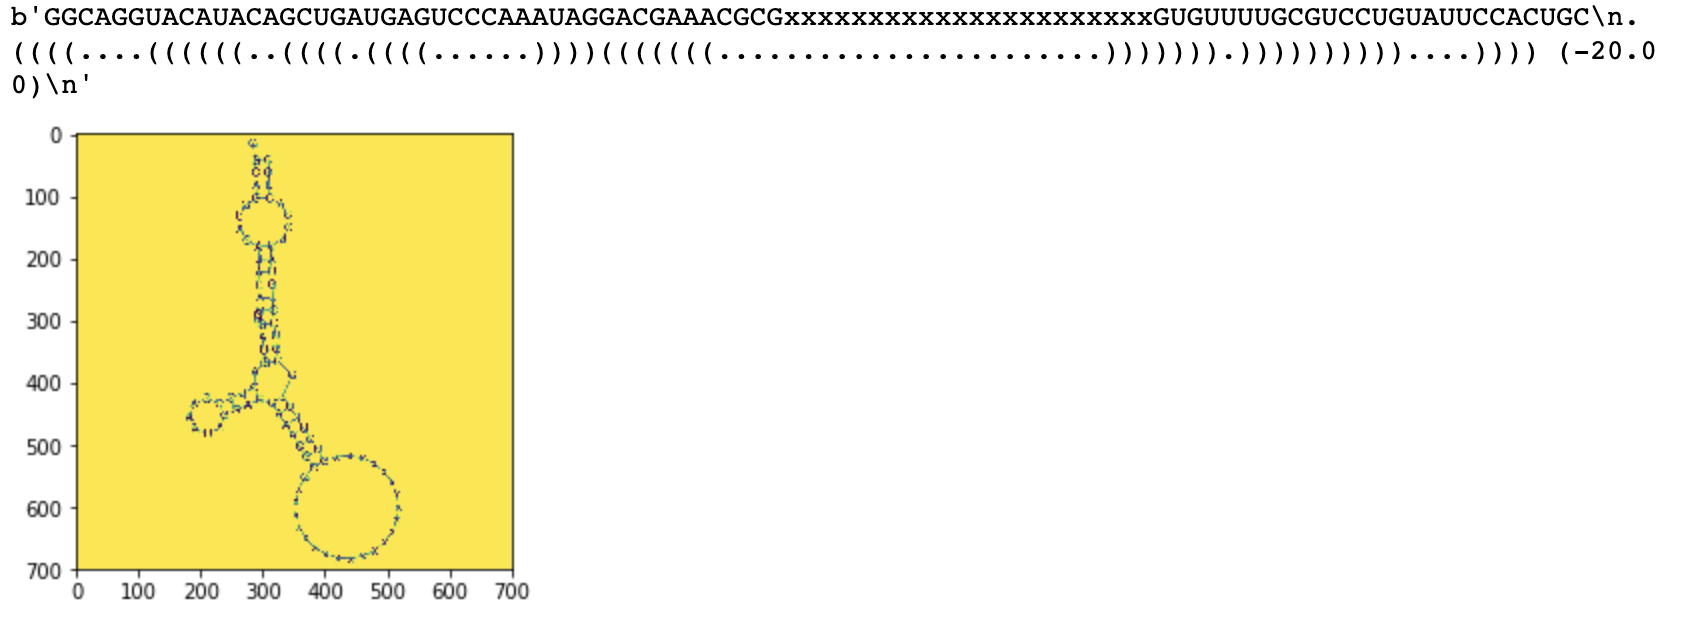

In [31]:
img = WImage(filename='rna_not_1_constraints.png')
img

(3) <b>Simulating OBS binding for AND-1 and OR-1 </b>is more complicated. Recall that AND and OR logic gates   have two inputs, and so their truth tables have four rows: F/F, T/F, F/T, and T/T. In(3) Simulating OBS binding for AND-1 and OR-1 is more complicated. Recall that AND and OR logic gates have two inputs, and so their truth tables have four rows: F/F, T/F, F/T, and T/T. In
part (1) we simulated the F/F case, and so now must simulate the other three. This will require you to produce three constraint files for AND-1, and three for OR-1. One file will have OBS-1 x’d  out, another will have OBS-2 x’d out, and the third will have both OBS-1 and OBS-2 x’d out. Produce the constraint files, run RNAfold, and compare the output files to the paper. Determine whether the red regions (which you noted in your table above) pair with each other for each of the four possible input combinations. Generate a truth table for the AND-1 and the OR-1 riboswitches based on your results

In [ ]:
# OR-1 OBS1 bound and OBS2 bound (TT)
proc = subprocess.run('RNAfold -C or_1_constraintsTT.txt', stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True, shell=True)
print(proc.stdout)
proc2 = subprocess.run(['RNAplot'], input=proc.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
proc3 = subprocess.call('convert rna.ps TTrna_or_1_constraints.png', shell=True)
img = img.imread('TTrna_or_1_constraints.png')
imgplot = plt.imshow(img)
plt.show()

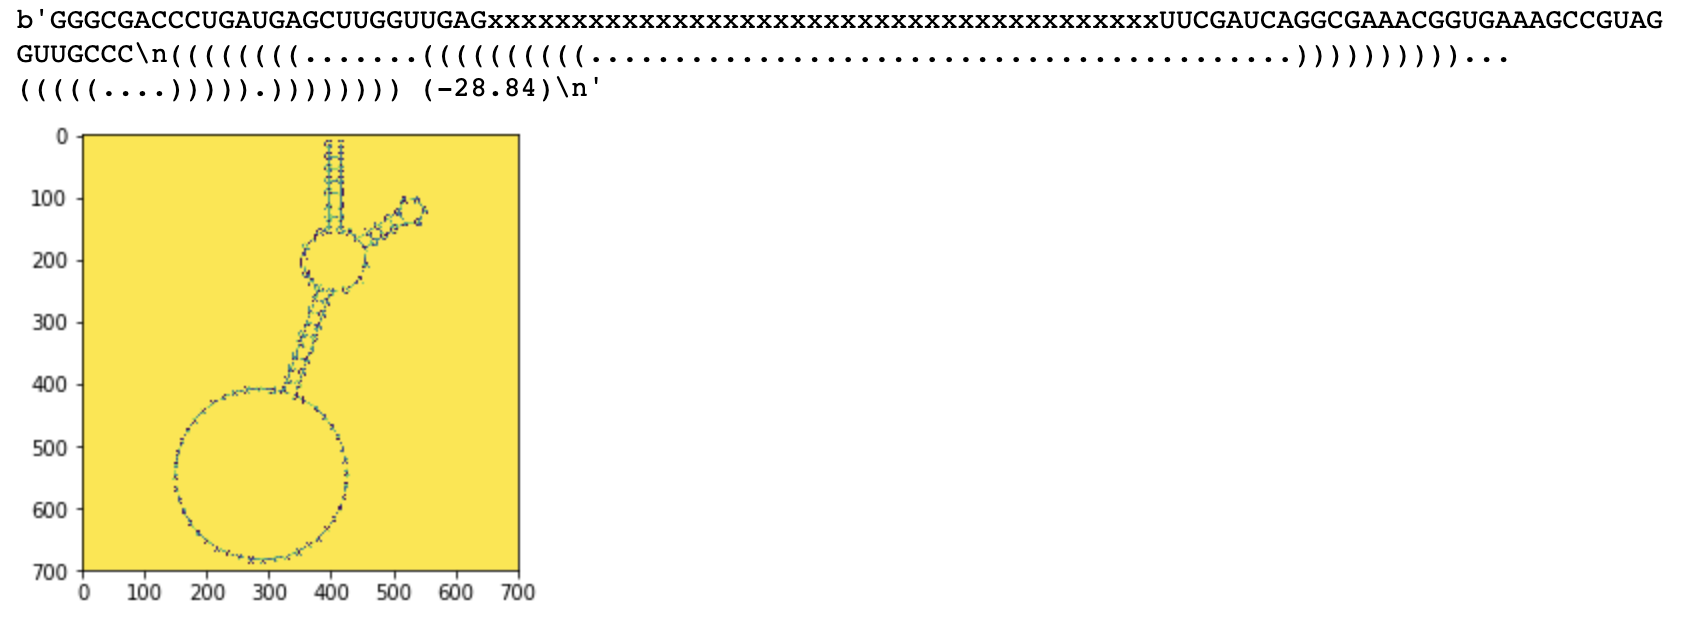

In [32]:
img = WImage(filename='TTrna_or_1_constraints.png')
img

In [ ]:
# OR-1 OBS1 bound and OBS2 unbound (TF)
proc = subprocess.run('RNAfold -C or_1_constraintsTF.txt', stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True, shell=True)
print(proc.stdout)
proc2 = subprocess.run(['RNAplot'], input=proc.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
proc3 = subprocess.call('convert rna.ps TFrna_or_1_constraints.png', shell=True)
img = img.imread('TFrna_or_1_constraints.png')
imgplot = plt.imshow(img)
plt.show()

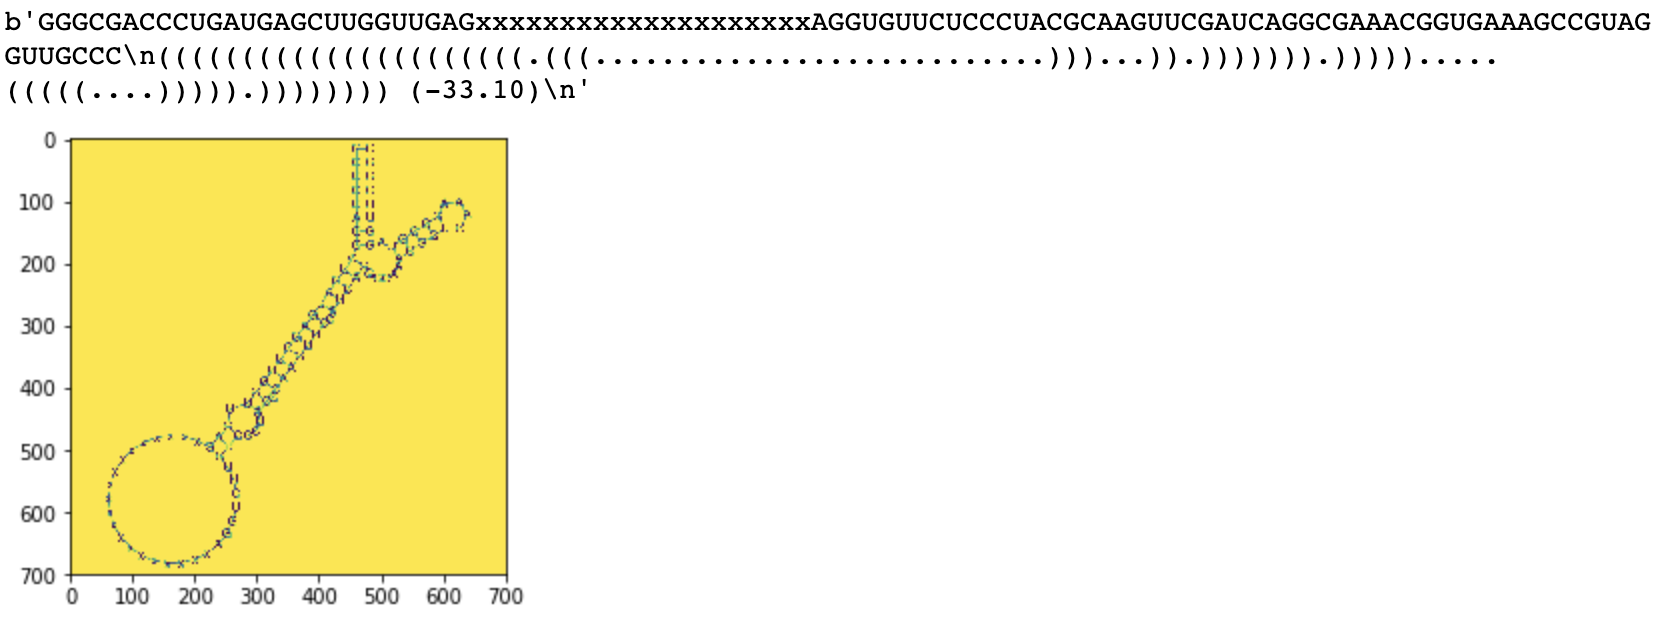

In [33]:
img = WImage(filename='TFrna_or_1_constraints.png')
img

In [ ]:
# OR-1 OBS1 and OBS2 unbound (FF)
proc = subprocess.run(['RNAfold'], input = bytes(or1, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE,check=True)
proc2 = subprocess.run(['RNAplot'], input=proc.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
proc3 = subprocess.call('convert rna.ps rna_or_1.png', shell=True)
img = img.imread('rna_or_1.png')
imgplot = plt.imshow(img)
plt.show()

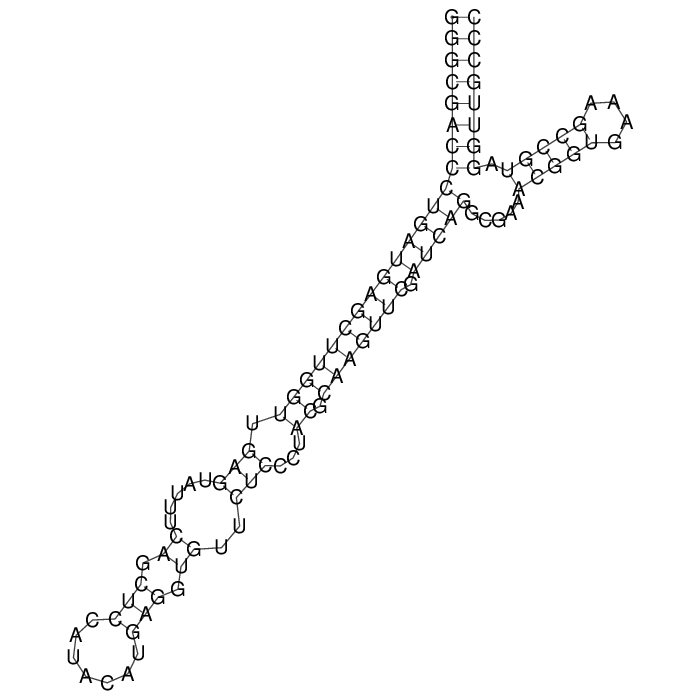

In [34]:
img = WImage(filename='rna_or_1.png')
img

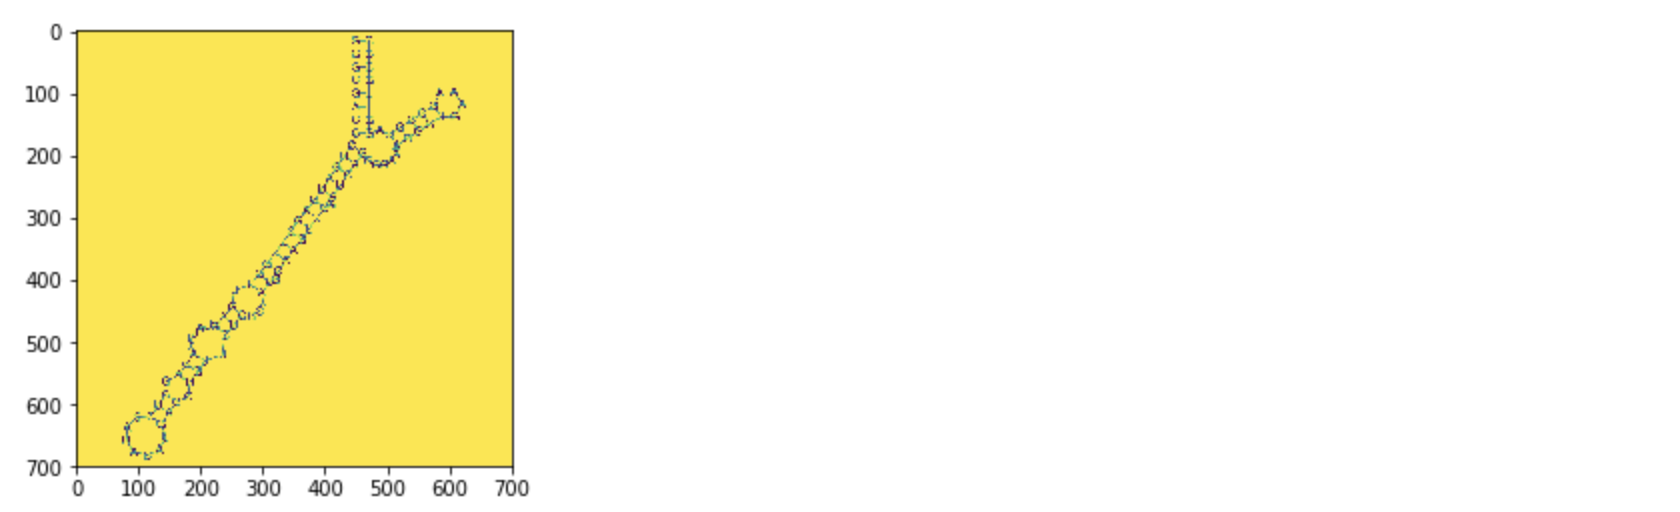

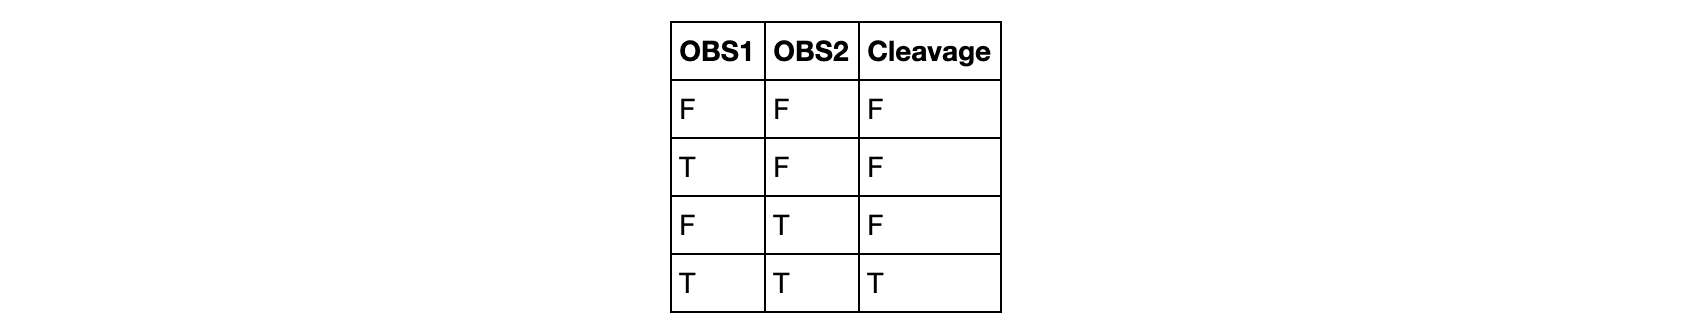

In [39]:
# AND-1 Truth Table
andTT = WImage(filename='and-1TT.png')
andTT

Since they are consistent with the nature of an AND gate, the paper succesfully created an AND riboswitch.

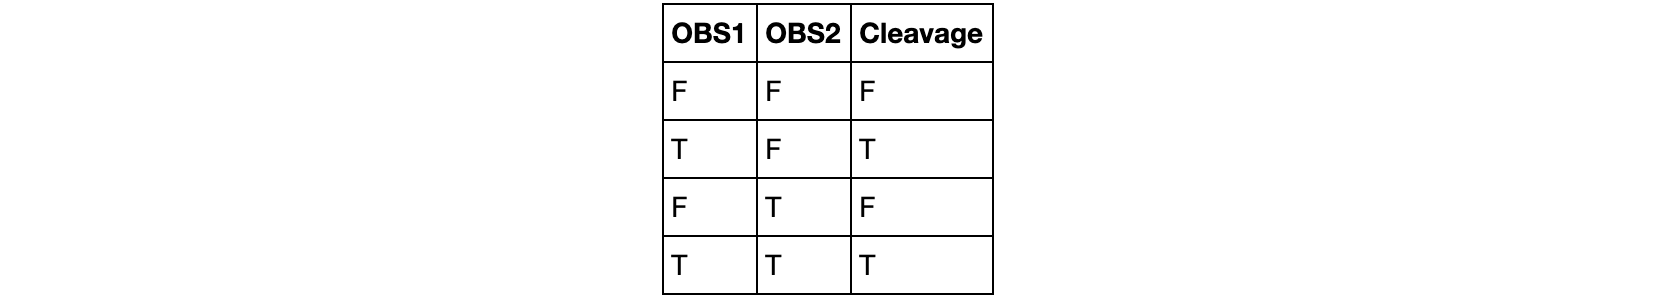

In [41]:
# OR-1 Truth Table
orTT = WImage(filename='or=1TT.png')
orTT

The fold for the second OBS region did not match that with the paper's result, but besides that, I can say that the paper was successful in creating an OR-gate riboswitch.